<a href="https://colab.research.google.com/github/LeandroCoelhos/estudos_datascience/blob/main/Limpeza_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# DataFrame original com as colunas
df = pd.DataFrame({
    'ID': np.arange(1, 1001),
    'Idade': np.random.randint(18, 66, 1000),
    'Categoria': np.random.choice(['A', 'B', 'C', 'D'], 1000),
    'Renda': np.random.uniform(1000, 5000, 1000)
})

# Adicionar valores numéricos como strings e letras em algumas linhas
df.loc[3, 'Idade'] = 'Vinte'
df.loc[7, 'Categoria'] = 'E'
df.loc[15, 'Renda'] = 'Baixa'

# Exibir o DataFrame resultante
print(df)

       ID  Idade Categoria        Renda
0       1     18         A  3579.865033
1       2     24         B  2990.420575
2       3     54         C  4395.853217
3       4  Vinte         D  1665.486436
4       5     25         D  2767.664076
..    ...    ...       ...          ...
995   996     18         B  3794.446505
996   997     21         A  2946.329818
997   998     26         B  4879.995805
998   999     38         D  2173.345363
999  1000     42         A  3706.618511

[1000 rows x 4 columns]


In [2]:
pd.get_dummies(df, columns=['Categoria'])

,ID,Idade,Renda,Categoria_A,Categoria_B,Categoria_C,Categoria_D,Categoria_E
0,1,18,3579.865033,1,0,0,0,0
1,2,24,2990.420575,0,1,0,0,0
2,3,54,4395.853217,0,0,1,0,0
3,4,Vinte,1665.486436,0,0,0,1,0
4,5,25,2767.664076,0,0,0,1,0
...,...,...,...,...,...,...,...,...
995,996,18,3794.446505,0,1,0,0,0
996,997,21,2946.329818,1,0,0,0,0
997,998,26,4879.995805,0,1,0,0,0
998,999,38,2173.345363,0,0,0,1,0


In [3]:
df['Idade'] = pd.to_numeric(df['Idade'], errors='coerce')

In [4]:
df = df.fillna(df.mean())
df

<ipython-input-4-f383654e7baf>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


,ID,Idade,Categoria,Renda
0,1,18.000000,A,3579.865033
1,2,24.000000,B,2990.420575
2,3,54.000000,C,4395.853217
3,4,41.823824,D,1665.486436
4,5,25.000000,D,2767.664076
...,...,...,...,...
995,996,18.000000,B,3794.446505
996,997,21.000000,A,2946.329818
997,998,26.000000,B,4879.995805
998,999,38.000000,D,2173.345363


In [6]:
df['app'] = np.where(df['Renda'] == 2000, 1, 0)
df

,ID,Idade,Categoria,Renda,app
0,1,18.000000,A,3579.865033,0
1,2,24.000000,B,2990.420575,0
2,3,54.000000,C,4395.853217,0
3,4,41.823824,D,1665.486436,0
4,5,25.000000,D,2767.664076,0
...,...,...,...,...,...
995,996,18.000000,B,3794.446505,0
996,997,21.000000,A,2946.329818,0
997,998,26.000000,B,4879.995805,0
998,999,38.000000,D,2173.345363,0


In [7]:
df['Uniforme'] = np.random.uniform(0, 1, size=len(df))
df['Normal'] = np.random.normal(loc=0, scale=1, size=len(df))
df['Exponencial'] = np.random.exponential(scale=1, size=len(df))
df

,ID,Idade,Categoria,Renda,app,Uniforme,Normal,Exponencial
0,1,18.000000,A,3579.865033,0,0.469726,-0.725227,0.239126
1,2,24.000000,B,2990.420575,0,0.819561,-0.009626,0.792268
2,3,54.000000,C,4395.853217,0,0.352458,-0.895339,0.179595
3,4,41.823824,D,1665.486436,0,0.207396,-0.679053,0.748704
4,5,25.000000,D,2767.664076,0,0.269753,-1.206079,1.733107
...,...,...,...,...,...,...,...,...
995,996,18.000000,B,3794.446505,0,0.125669,0.089979,1.127098
996,997,21.000000,A,2946.329818,0,0.855498,0.037798,0.281958
997,998,26.000000,B,4879.995805,0,0.840773,0.509895,0.413771
998,999,38.000000,D,2173.345363,0,0.787372,0.021523,0.271616


# Hierarquico


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Criar um conjunto de dados de exemplo
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

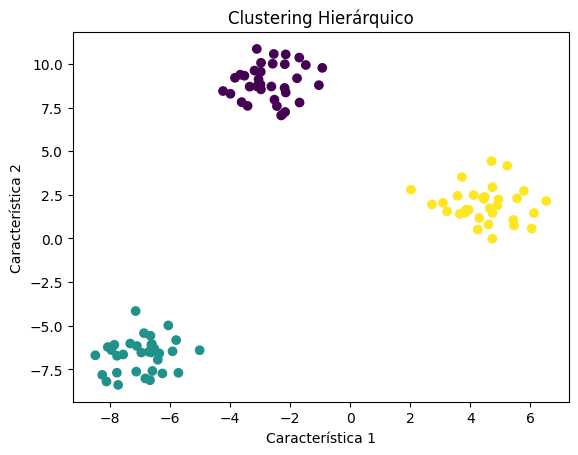

In [86]:
n_clusters = 3
# Criar uma instância do algoritmo de clustering hierárquico
clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Realizar o clustering nos dados
labels = clustering.fit_predict(X)

# Plotar os resultados
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Clustering Hierárquico")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

# Exemplo mais real

In [61]:
import numpy as np
import pandas as pd

np.random.seed(0)

# Tamanho dos conjuntos de dados
tamanho_5000 = 5000
tamanho_1000 = 1000

# Colunas dos conjuntos de dados
colunas = ['ID', 'Idade', 'Categoria', 'Renda', 'Limite_Cartao']

# Criação dos dados para o conjunto de tamanho 5000
dados_5000 = {
    'ID': np.arange(tamanho_5000),
    'Idade': np.random.randint(18, 65, tamanho_5000),
    'Categoria': np.random.choice(['A', 'B', 'C', 'D', 'E', 'F', 'G'], tamanho_5000),
    'Renda': np.random.normal(5000, 1000, tamanho_5000),
    'Limite_Cartao': np.random.normal(10000, 2000, tamanho_5000)
}

# Criação dos dados para o conjunto de tamanho 1000
dados_1000 = {
    'ID': np.arange(tamanho_1000),
    'Idade': np.random.randint(18, 65, tamanho_1000),
    'Categoria': np.random.choice(['A', 'B', 'C', 'D', 'E', 'F', 'G'], tamanho_1000),
    'Renda': np.random.normal(5000, 1000, tamanho_1000),
    'Limite_Cartao': np.random.normal(10000, 2000, tamanho_1000)
}

# Adição de outliers
porcentagem_outliers = np.random.uniform(0.05, 0.1)
num_outliers = int(porcentagem_outliers * tamanho_5000)

outliers_id = np.random.choice(tamanho_5000, num_outliers, replace=False)
outliers_renda = np.random.uniform(2000, 15000, num_outliers)
outliers_limite_cartao = np.random.uniform(5000, 25000, num_outliers)

dados_5000['Renda'][outliers_id] = outliers_renda
dados_5000['Limite_Cartao'][outliers_id] = outliers_limite_cartao

# Criação dos dataframes
df_treino = pd.DataFrame(dados_5000, columns=colunas)
df_teste = pd.DataFrame(dados_1000, columns=colunas)

# Pre Pross

## Remoção de outliers

In [62]:
def clip_quantiles_treino(df_treino, colunas_numericas, quantiles):
    df = df_treino.copy()
    clip_values = {}

    for coluna in colunas_numericas:
        quantil_min = df[coluna].quantile(quantiles[coluna][0])
        quantil_max = df[coluna].quantile(quantiles[coluna][1])

        df[coluna] = df[coluna].clip(quantil_min, quantil_max)
        clip_values[coluna] = (quantil_min, quantil_max)

    return df, clip_values

def clip_quantiles_teste(df_teste, colunas_numericas, clip_values):
    df = df_teste.copy()
    for coluna in colunas_numericas:
        quantil_min, quantil_max = clip_values[coluna]
        df[coluna] = df[coluna].clip(quantil_min, quantil_max)

    return df

In [73]:
# Definir colunas numéricas e quantis desejados
colunas_numericas = ['Idade', 'Renda', 'Limite_Cartao']
quantiles = {
    'Idade': (0.1, 0.9),
    'Renda': (0.05, 0.95),
    'Limite_Cartao': (0.01, 0.99)
}

# Aplicar o recorte no conjunto de treinamento
df_treino_clip, clip_values = clip_quantiles_treino(df_treino, colunas_numericas, quantiles)

# Aplicar o mesmo recorte no conjunto de teste
df_teste_clip = clip_quantiles_teste(df_teste, colunas_numericas, clip_values)

### Vizualizar BoxPlot

In [76]:
import matplotlib.pyplot as plt

def boxplot_comparativo(df_antes, df_depois, colunas_numericas):
    fig, axs = plt.subplots(len(colunas_numericas), 2, figsize=(12, 8))

    for i, coluna in enumerate(colunas_numericas):
        # Boxplot do DataFrame antes da clipagem
        axs[i, 0].boxplot(df_antes[coluna])
        axs[i, 0].set_title(f'Antes - {coluna}')

        # Boxplot do DataFrame depois da clipagem
        axs[i, 1].boxplot(df_depois[coluna])
        axs[i, 1].set_title(f'Depois - {coluna}')

    # Ajustar layout
    plt.tight_layout()
    plt.show()

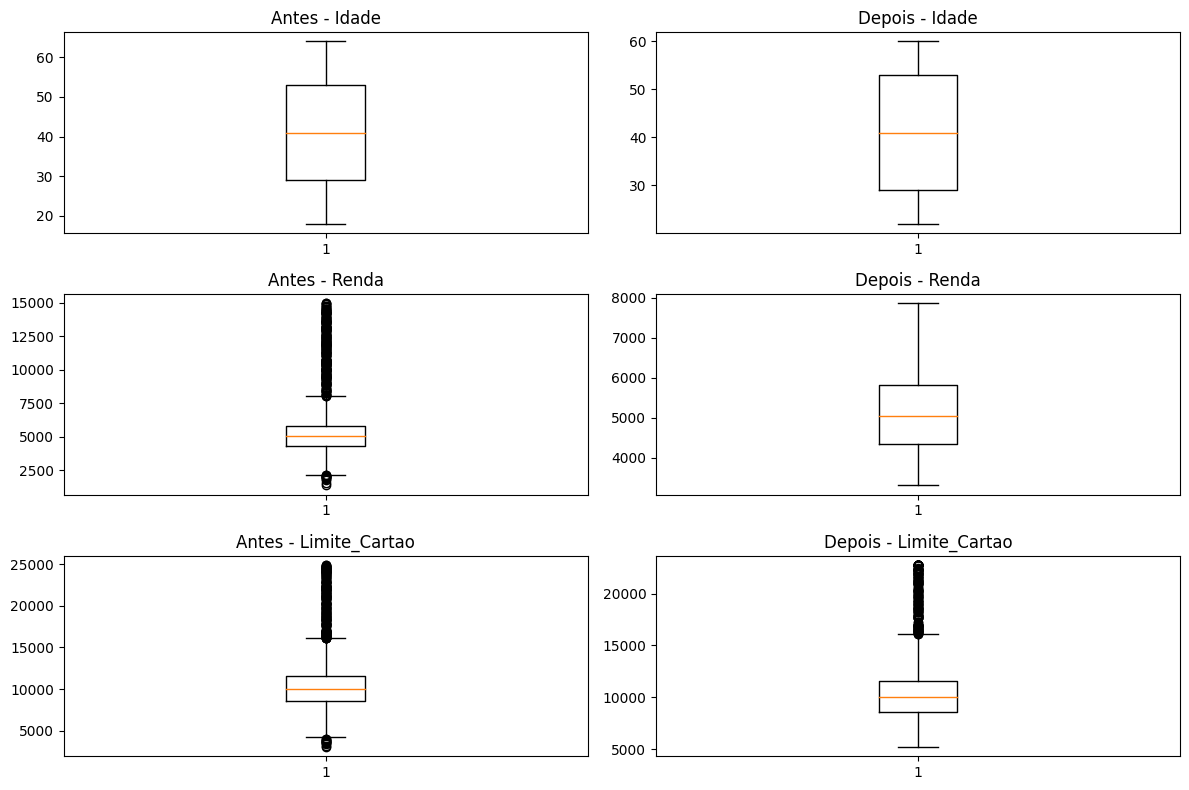

In [77]:
# Definir colunas numéricas
colunas_numericas = ['Idade', 'Renda', 'Limite_Cartao']

# Chamar a função para criar o boxplot comparativo
boxplot_comparativo(df_treino, df_treino_clip, colunas_numericas)

## One Hot encod

In [78]:
from sklearn.preprocessing import OneHotEncoder

def aplicar_dummy_treino(df_treino, colunas_dummy):
    df = df_treino.copy()
    # Criação do codificador Dummy
    encoder = OneHotEncoder()

    # Ajusta o codificador Dummy com base nas categorias do conjunto de treinamento
    encoder.fit(df[colunas_dummy])

    # Aplica o codificador Dummy no conjunto de treinamento
    dummy_treino = encoder.transform(df[colunas_dummy]).toarray()

    # Cria um novo DataFrame com as colunas dummy
    df_dummy_treino = pd.DataFrame(dummy_treino, columns=encoder.get_feature_names_out(colunas_dummy))

    # Remove as colunas originais do conjunto de treinamento
    df_treino_encoded = df.drop(colunas_dummy, axis=1)

    # Concatena o DataFrame dummy com o conjunto de treinamento codificado
    df_treino_encoded = pd.concat([df_treino_encoded, df_dummy_treino], axis=1)

    return df_treino_encoded, encoder

def aplicar_dummy_teste(df_teste, colunas_dummy, encoder):
    df = df_teste.copy()
    # Aplica o codificador Dummy no conjunto de teste
    dummy_teste = encoder.transform(df[colunas_dummy]).toarray()

    # Cria um novo DataFrame com as colunas dummy
    df_dummy_teste = pd.DataFrame(dummy_teste, columns=encoder.get_feature_names_out(colunas_dummy))

    # Remove as colunas originais do conjunto de teste
    df_teste_encoded = df.drop(colunas_dummy, axis=1)

    # Concatena o DataFrame dummy com o conjunto de teste codificado
    df_teste_encoded = pd.concat([df_teste_encoded, df_dummy_teste], axis=1)

    return df_teste_encoded

In [81]:
# Colunas dummy
colunas_dummy = ['Categoria']

# Aplicar o codificador Dummy no conjunto de treinamento
df_treino_encoded, encoder = aplicar_dummy_treino(df_treino_clip, colunas_dummy)

# Aplicar o mesmo codificador Dummy no conjunto de teste
df_teste_encoded = aplicar_dummy_teste(df_teste_clip, colunas_dummy, encoder)

In [85]:
df_treino.shape, df_treino_clip.shape, df_treino_encoded.shape,

((5000, 5), (5000, 5), (5000, 11))

In [82]:
df_treino_encoded.head()

,ID,Idade,Renda,Limite_Cartao,Categoria_A,Categoria_B,Categoria_C,Categoria_D,Categoria_E,Categoria_F,Categoria_G
0,0,60,3459.681499,9972.765390,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,22,7093.440496,8015.424497,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,22,7323.681695,22766.676089,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,22,6288.499721,10706.121451,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,57,5009.273330,14578.438761,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
df_teste_encoded.describe()

,ID,Idade,Renda,Limite_Cartao,Categoria_A,Categoria_B,Categoria_C,Categoria_D,Categoria_E,Categoria_F,Categoria_G
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,41.22800,4976.222140,10133.306898,0.128000,0.141000,0.144000,0.147000,0.144000,0.156000,0.140000
std,288.819436,12.88876,953.891664,1932.794229,0.334257,0.348196,0.351265,0.354283,0.351265,0.363037,0.347161
min,0.000000,22.00000,3312.209918,5196.967225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,249.750000,29.75000,4331.817543,8847.483767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,499.500000,42.00000,4956.344791,10138.986327,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,749.250000,53.00000,5561.370926,11438.639567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,999.000000,60.00000,7870.955377,16063.859355,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Aplicar Hierarquico

In [92]:
X = df_treino_encoded[['Idade', 'Renda', 'Limite_Cartao', 'Categoria_A', 'Categoria_G']]
# Atribuir as colunas desejadas do df_teste_encoded ao X_teste
X_teste = df_teste_encoded[['Idade', 'Renda', 'Limite_Cartao', 'Categoria_A', 'Categoria_G']]

In [90]:
from sklearn.cluster import AgglomerativeClustering

# Crie uma instância do modelo AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3)

# Treine o modelo usando o conjunto de dados X
clustering.fit(X)

# Obtenha os rótulos dos clusters atribuídos a cada amostra
labels = clustering.labels_

# Silhueta

<ipython-input-6-d41853cc6266>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(i / n_clusters)


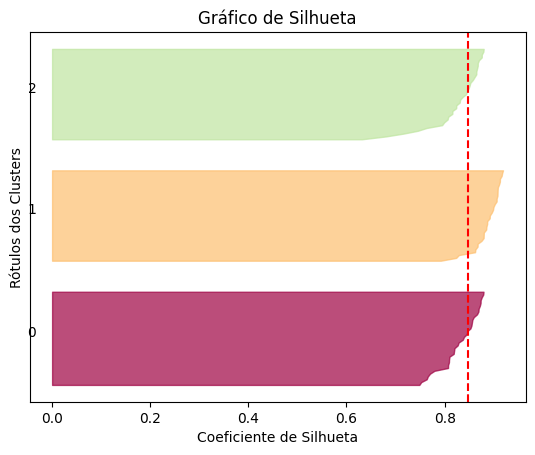

In [ ]:
# Calcular o coeficiente de silhueta para cada amostra
silhouette_avg = silhouette_score(X, labels)
sample_silhouette_values = silhouette_samples(X, labels)

# Plotar o coeficiente de silhueta
fig, ax = plt.subplots()
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.get_cmap("Spectral")(i / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_xlabel("Coeficiente de Silhueta")
ax.set_ylabel("Rótulos dos Clusters")
ax.set_title("Gráfico de Silhueta")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
plt.show()

# Joelho

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

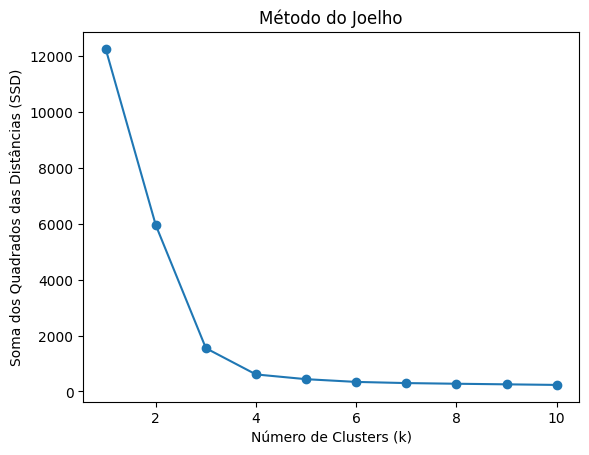

In [ ]:

# Criar um conjunto de dados de exemplo
X, y = make_blobs(n_samples=200, centers=6, random_state=42)

# Definir uma lista para armazenar as somas dos quadrados das distâncias
ssd = []

# Testar diferentes valores de k
for k in range(1, 11):
    # Criar uma instância do algoritmo de clustering (K-means)
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(X)
    # Armazenar a soma dos quadrados das distâncias
    ssd.append(clustering.inertia_)

# Plotar a curva do método do joelho
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Quadrados das Distâncias (SSD)')
plt.title('Método do Joelho')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

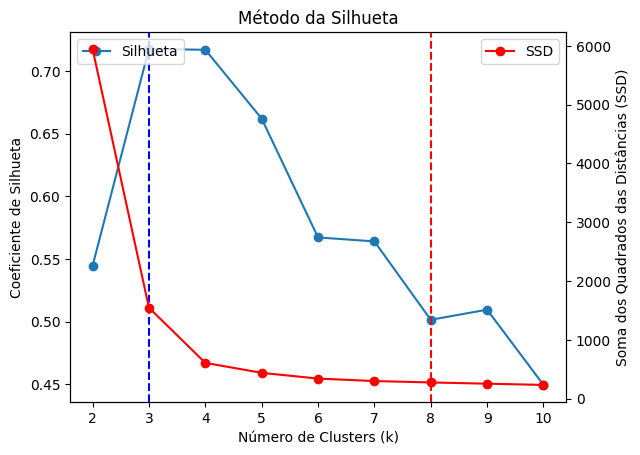

Melhor número de clusters baseado na Silhueta: 3
Coeficiente de Silhueta correspondente: 0.7175794379629798
Melhor número de clusters baseado no Método do Joelho: 8


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=200, centers=6, random_state=42)

def evaluate_clusters(X, max_clusters):
    # Lista para armazenar os valores de silhueta
    silhouette_scores = []
    # Lista para armazenar as somas dos quadrados das distâncias
    ssd = []

    for k in range(2, max_clusters + 1):
        # Criar uma instância do algoritmo de clustering (K-means)
        clustering = KMeans(n_clusters=k, random_state=42)
        clustering.fit(X)

        # Calcular o coeficiente de silhueta médio
        silhouette_avg = silhouette_score(X, clustering.labels_)
        silhouette_scores.append(silhouette_avg)

        # Armazenar a soma dos quadrados das distâncias
        ssd.append(clustering.inertia_)

    # Plotar a curva de silhueta
    fig, ax1 = plt.subplots()
    ax1.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', label='Silhueta')
    ax1.set_xlabel('Número de Clusters (k)')
    ax1.set_ylabel('Coeficiente de Silhueta')
    ax1.set_title('Método da Silhueta')

    # Plotar a curva do método do joelho
    ax2 = ax1.twinx()
    ax2.plot(range(2, max_clusters + 1), ssd, marker='o', color='r', label='SSD')
    ax2.set_ylabel('Soma dos Quadrados das Distâncias (SSD)')

    # Encontrar o ponto de máximo coeficiente de silhueta
    best_silhouette_idx = np.argmax(silhouette_scores) + 2
    best_silhouette = silhouette_scores[best_silhouette_idx - 2]

    # Encontrar o ponto de joelho na curva SSD
    diff = np.diff(ssd)
    best_knee_idx = np.argmax(diff) + 2

    # Plotar as linhas verticais para indicar os melhores pontos
    ax1.axvline(x=best_silhouette_idx, linestyle='--', color='b')
    ax2.axvline(x=best_knee_idx, linestyle='--', color='r')

    # Adicionar legendas
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.show()

    return best_silhouette_idx, best_silhouette, best_knee_idx

# Exemplo de uso
 # Seus dados
max_clusters = 10  # Número máximo de clusters a serem avaliados

best_silhouette_idx, best_silhouette, best_knee_idx = evaluate_clusters(X, max_clusters)

print(f"Melhor número de clusters baseado na Silhueta: {best_silhouette_idx}")
print(f"Coeficiente de Silhueta correspondente: {best_silhouette}")
print(f"Melhor número de clusters baseado no Método do Joelho: {best_knee_idx}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

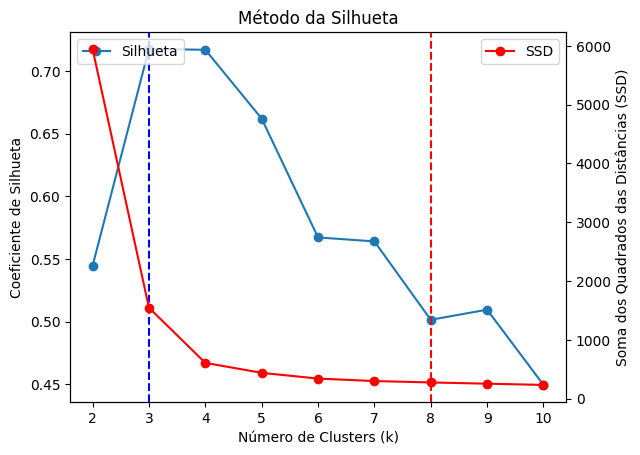

Melhor número de clusters baseado na Silhueta: 3
Coeficiente de Silhueta correspondente: 0.7175794379629798
Melhor número de clusters baseado no Método do Joelho: 8


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=200, centers=6, random_state=42)

def evaluate_clusters(X, max_clusters):
    # Lista para armazenar os valores de silhueta
    silhouette_scores = []
    # Lista para armazenar as somas dos quadrados das distâncias
    ssd = []

    for k in range(2, max_clusters + 1):
        # Criar uma instância do algoritmo de clustering (K-means)
        clustering = KMeans(n_clusters=k, random_state=42)
        clustering.fit(X)

        # Calcular o coeficiente de silhueta médio
        silhouette_avg = silhouette_score(X, clustering.labels_)
        silhouette_scores.append(silhouette_avg)

        # Armazenar a soma dos quadrados das distâncias
        ssd.append(clustering.inertia_)

    # Plotar a curva de silhueta
    fig, ax1 = plt.subplots()
    ax1.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', label='Silhueta')
    ax1.set_xlabel('Número de Clusters (k)')
    ax1.set_ylabel('Coeficiente de Silhueta')
    ax1.set_title('Método da Silhueta')

    # Plotar a curva do método do joelho
    ax2 = ax1.twinx()
    ax2.plot(range(2, max_clusters + 1), ssd, marker='o', color='r', label='SSD')
    ax2.set_ylabel('Soma dos Quadrados das Distâncias (SSD)')

    # Encontrar o ponto de máximo coeficiente de silhueta
    best_silhouette_idx = np.argmax(silhouette_scores) + 2
    best_silhouette = silhouette_scores[best_silhouette_idx - 2]

    # Encontrar o ponto de joelho na curva SSD
    diff = np.diff(ssd)
    best_knee_idx = np.argmax(diff) + 2

    # Plotar as linhas verticais para indicar os melhores pontos
    ax1.axvline(x=best_silhouette_idx, linestyle='--', color='b')
    ax2.axvline(x=best_knee_idx, linestyle='--', color='r')

    # Adicionar legendas
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.show()

    return best_silhouette_idx, best_silhouette, best_knee_idx

# Exemplo de uso
 # Substitua ... pela sua matriz de dados
max_clusters = 10  # Número máximo de clusters a serem avaliados

best_silhouette_idx, best_silhouette, best_knee_idx = evaluate_clusters(X, max_clusters)

print(f"Melhor número de clusters baseado na Silhueta: {best_silhouette_idx}")
print(f"Coeficiente de Silhueta correspondente: {best_silhouette}")
print(f"Melhor número de clusters baseado no Método do Joelho: {best_knee_idx}")
